In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1 Density plots
data = pd.read_csv('mpg.csv')

In [3]:
data.shape

(234, 11)

In [4]:
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [18]:
data.cyl.unique()

array([4, 6, 8, 5])

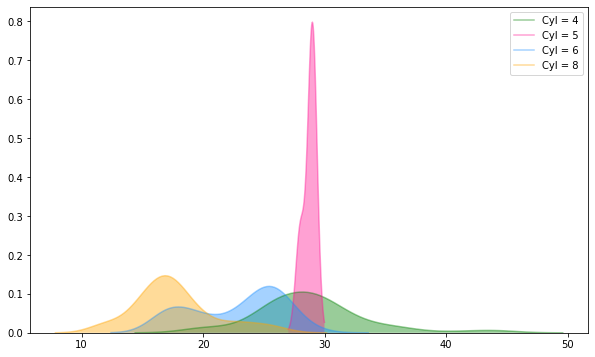

In [22]:
plt.figure(figsize = (10,6))

# Kernel Density Esitimation Plot
sns.kdeplot(data.hwy[data.cyl == 4],
            shade = True,
            color = 'green',
            label = 'Cyl = 4',
            alpha = 0.4)
sns.kdeplot(data.hwy[data.cyl == 5],
            shade = True,
            color = 'deeppink',
            label = 'Cyl = 5',
            alpha = 0.4)
sns.kdeplot(data.hwy[data.cyl == 6],
            shade = True,
            color = 'dodgerblue',
            label = 'Cyl = 6',
            alpha = 0.4)
sns.kdeplot(data.hwy[data.cyl == 8],
            shade = True,
            color = 'orange',
            label = 'Cyl = 8',
            alpha = 0.4)
plt.show()

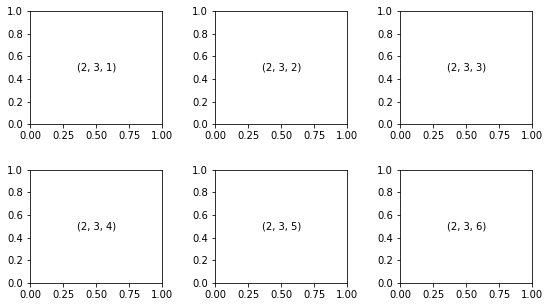

In [61]:
#2 Create a 2x3 grid
plt.figure(figsize = (9,5))

plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 7):
    plt.subplot(2,3,i)
    plt.text(0.5, 0.5, str((2,3,i)), ha = 'center', va = 'center') # ha: horizontal allignment

plt.show()

<Figure size 432x288 with 0 Axes>

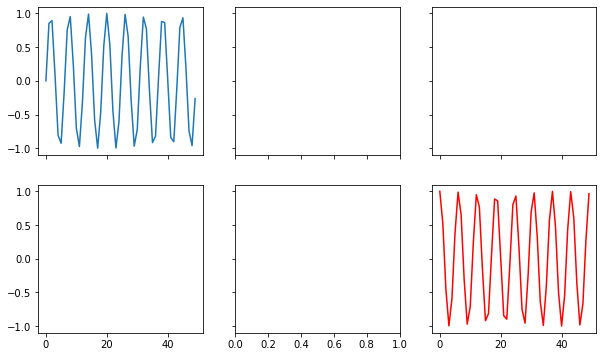

In [107]:
#3 Create a 2x3 graph with sin and cos plots

plt.figure()

fig, ax = plt.subplots(2, 3, sharex = 'col', sharey = 'row',
                       figsize = (10, 6))
plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
x = np.linspace(0, 50)
ax[0,0].plot(np.sin(x))
ax[1,2].plot(np.cos(x), color = 'red')

plt.show()

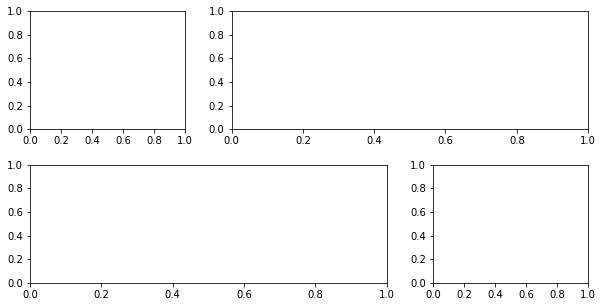

In [113]:
#4
fig = plt.figure(figsize = (10,5))

grid = plt.GridSpec(2, 3, wspace = 0.3, hspace = 0.3)

fig.add_subplot(grid[0,0])
fig.add_subplot(grid[0,1:3])
fig.add_subplot(grid[1,0:2])
fig.add_subplot(grid[1,2])

plt.show()

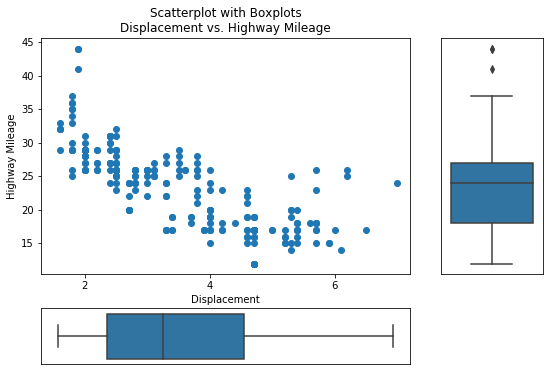

In [156]:
#5 Marginal Boxplots
fig = plt.figure(figsize = (9,6))

grid = plt.GridSpec(4, 4, wspace = 0.3, hspace = 0.6)

ax_main = fig.add_subplot(grid[0:-1,0:3])
ax_right = fig.add_subplot(grid[0:3,3])
ax_bottom = fig.add_subplot(grid[3,0:3])

# plot the main graph(scatter plot)
ax_main.scatter('displ', 'hwy', data=data)
ax_main.set_xlim(1.3,7.2)
ax_main.set_xticks(np.arange(2,7,2))

# plot the right boxplot
sns.boxplot(data.hwy, ax = ax_right, orient = 'v')
ax_right.set(xticks = [], yticks = [], ylabel = '')

# plot the bottom boxplot
sns.boxplot(data.displ, ax = ax_bottom)
ax_bottom.set(xticks = [], yticks = [], xlabel = '')

# set title, xlabel, ylabel
ax_main.set(title = 'Scatterplot with Boxplots\nDisplacement vs. Highway Mileage',
            xlabel = 'Displacement',
            ylabel = 'Highway Mileage')

plt.show()

In [157]:
#6

econ = pd.read_csv('economics.csv')

In [158]:
econ.shape

(574, 6)

In [159]:
econ.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


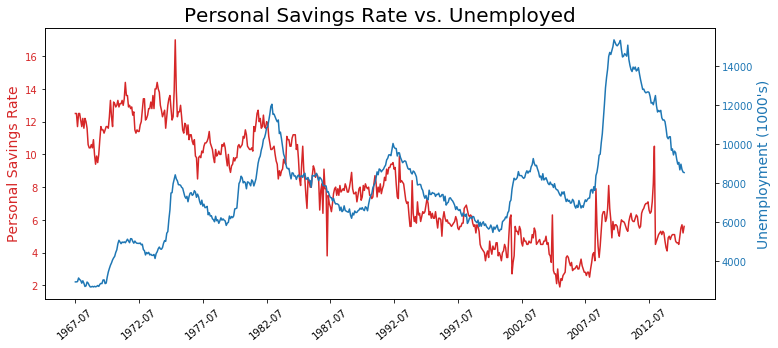

In [192]:
fig = plt.figure(figsize=(12,5))

plt.plot('date', 'psavert', data=econ, color = 'tab:red')
ax = plt.gca()

# set the main y axis (left)
ax.tick_params(axis='y',labelcolor='tab:red')
ax.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=14)

# set the secondary y axis(right)
ax_right = ax.twinx()
ax_right.plot('date', 'unemploy', data=econ, color='tab:blue')
ax_right.tick_params(axis='y', labelcolor='tab:blue')
ax_right.set_ylabel("Unemployment (1000's)", color='tab:blue', fontsize=14)

# set the x axis
econ['datem'] = econ['date'].apply(lambda x: x[:7])
xlabels = econ.datem.to_list()[::60]
ax.set_xticks(np.arange(0,len(econ.date), 60))
ax.set_xticklabels(xlabels, rotation=40)

plt.title('Personal Savings Rate vs. Unemployed', fontsize=20)

plt.show()